In [315]:
#1. Build a regression model to predict the price of a house. You may choose between Ordinary Least Squares Regression, LASSO, Ridge or Elastic Net.

#You may need to clean and transform the data, including feature engineering, creating dummy variables, or using dimensionality reduction.
#why you chose the approach you did
#ols mse is 206115.46 
#ridge mse is 206289.87 
#lasso mse is 205979.05 
#elastic net mse is 281546.66
#why it's the best approach for the data provided.
#Based on the provided MSE values, the Lasso regression model had the lowest MSE of 205,979.05, indicating it performed slightly better than the other models.#
#2. Evaluate the model using techniques covered in class and explain the results. How do you know this is the best model you can build, given the tools you have?
#The model with the lowest MSE is the best model
#3. Explain the results to a business executive. What are the main drivers of house prices in King City? And how much do these drivers impact the price?
#Based on the correlation analysis, view, waterfront, bedrooms and floors all have impact to the house prices in King City. The main driver is sqrt_living.


In [316]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [317]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [318]:
df = pd.read_csv('/Users/youziya/OneDrive - York University/MBAN 6100 DATA SCIENCE I/Assignment/kc_house_data.csv')

In [319]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [320]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [321]:
df.dropna(inplace=True)

In [322]:
df.describe(include='all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580302e+09,NaN,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,NaN,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


In [323]:
df.drop('date',axis=1,inplace=True)

In [324]:
df.drop('zipcode',axis=1,inplace=True)

In [325]:
df.drop('id',axis=1,inplace=True)

In [326]:
df.drop('sqft_lot15',axis=1,inplace=True)

In [327]:
df.drop('sqft_living15',axis=1,inplace=True)

In [328]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,47.6993,-122.346
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,47.5107,-122.362
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,47.5944,-122.299
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,47.5345,-122.069


In [329]:
# Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_std = scaler.fit_transform(df)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

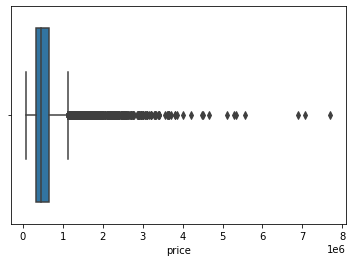

In [330]:
sns.boxplot(df['price'])

In [331]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045


In [332]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
df_std = scaler.fit_transform(df)

# Perform PCA
pca = PCA()
df_pca = pca.fit_transform(df_std)

# The transformed data is an array, convert it back into a dataframe
df_pca = pd.DataFrame(df_pca, columns=[f'PC{i+1}' for i in range(len(df.columns))])

# Print the explained variance ratio
print('Explained variance ratio:', pca.explained_variance_ratio_)

# Print the cumulative explained variance ratio
cumsum_variance = np.cumsum(pca.explained_variance_ratio_)
print('Cumulative explained variance ratio:', cumsum_variance)

# Show the first few rows of transformed dataframe
df_pca.head()

Explained variance ratio: [3.07625037e-01 1.39385278e-01 8.31459924e-02 7.95129667e-02
 6.42004191e-02 6.16167150e-02 5.30564149e-02 4.50796974e-02
 3.87052474e-02 3.48636410e-02 3.17693688e-02 2.04966578e-02
 1.53010156e-02 1.36307552e-02 1.16107936e-02 9.20994352e-33]
Cumulative explained variance ratio: [0.30762504 0.44701031 0.53015631 0.60966927 0.67386969 0.73548641
 0.78854282 0.83362252 0.87232777 0.90719141 0.93896078 0.95945744
 0.97475845 0.98838921 1.         1.        ]


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
0,-2.376884,-0.407779,-0.221246,0.224186,-0.003036,-0.123845,0.316967,0.007184,0.294100,-0.916242,-0.224060,0.228979,0.352397,-0.081701,-0.084314,3.105124e-14
1,0.276486,1.154021,-2.086509,-0.850795,3.494723,-2.397074,-0.304826,-0.324818,-0.330569,1.124918,0.135111,-0.122001,-0.244601,-0.898117,0.673186,-4.899589e-15
2,-3.490803,0.041344,-0.953973,-0.280859,0.628295,1.001141,0.722047,-0.491527,0.209855,-0.406264,0.190601,-0.340825,-0.349035,-0.266218,-0.202441,-2.300448e-14
3,-0.535322,2.031299,1.839576,-0.702728,-1.029905,-0.370653,-0.733489,0.441694,-0.093129,1.500646,-0.211865,0.588572,-0.697645,0.531544,-0.025587,1.365493e-14
4,-0.319287,-0.998276,-0.065694,0.174964,0.226417,0.577035,0.606254,-1.192082,-0.320831,-0.504134,-0.203482,0.603221,-0.101913,0.259411,-0.279248,3.327597e-15


In [333]:
# Let's do the same, but now let's reduce to 2 components
# Perform PCA
pca = PCA(n_components = 0.90)
df_pca = pca.fit_transform(df_std)

# The transformed data is an array, convert it back into a dataframe
df_pca = pd.DataFrame(df_pca)

# Print the explained variance ratio
print('Explained variance ratio:', pca.explained_variance_ratio_)

# Print the cumulative explained variance ratio
cumsum_variance = np.cumsum(pca.explained_variance_ratio_)
print('Cumulative explained variance ratio:', cumsum_variance)

# Show the first few rows of transformed dataframe
df_pca.head()

Explained variance ratio: [0.30762504 0.13938528 0.08314599 0.07951297 0.06420042 0.06161672
 0.05305641 0.0450797  0.03870525 0.03486364]
Cumulative explained variance ratio: [0.30762504 0.44701031 0.53015631 0.60966927 0.67386969 0.73548641
 0.78854282 0.83362252 0.87232777 0.90719141]


,0,1,2,3,4,5,6,7,8,9
0,-2.376884,-0.407779,-0.221246,0.224186,-0.003036,-0.123845,0.316967,0.007184,0.294100,-0.916242
1,0.276486,1.154021,-2.086509,-0.850795,3.494723,-2.397074,-0.304826,-0.324818,-0.330569,1.124918
2,-3.490803,0.041344,-0.953973,-0.280859,0.628295,1.001141,0.722047,-0.491527,0.209855,-0.406264
3,-0.535322,2.031299,1.839576,-0.702728,-1.029905,-0.370653,-0.733489,0.441694,-0.093129,1.500646
4,-0.319287,-0.998276,-0.065694,0.174964,0.226417,0.577035,0.606254,-1.192082,-0.320831,-0.504134


In [334]:
categorical_features = ['view','condition', 'grade']
numerical_features = ['yr_built', 'sqft_living']
target = 'price'

In [335]:
from sklearn.model_selection import train_test_split

In [336]:
# split data in train / test
X = df.drop(['price'],axis=1)
y = df['price']


In [337]:
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [338]:
X_train, X_test, y_train, y_test = train_test_split(df[categorical_features + numerical_features] ,df[target],test_size = 0.3, random_state=1234)

In [339]:
train_data = X_train.join(y_train)

In [340]:
train_data

,view,condition,grade,yr_built,sqft_living,price
15026,0,3,7,1995,1620,439000.0
7354,0,3,6,1962,1400,279900.0
6051,0,2,7,1925,1460,312000.0
4398,0,3,7,1968,1620,249950.0
9298,0,3,9,1999,2030,565000.0
...,...,...,...,...,...,...
8222,0,3,10,1905,3360,2193000.0
9449,0,4,9,1959,3600,1698000.0
8471,0,3,7,1947,1710,515000.0
17048,0,5,5,1948,1050,208000.0


array([[<AxesSubplot:title={'center':'view'}>,
        <AxesSubplot:title={'center':'condition'}>],
       [<AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'yr_built'}>],
       [<AxesSubplot:title={'center':'sqft_living'}>,
        <AxesSubplot:title={'center':'price'}>]], dtype=object)

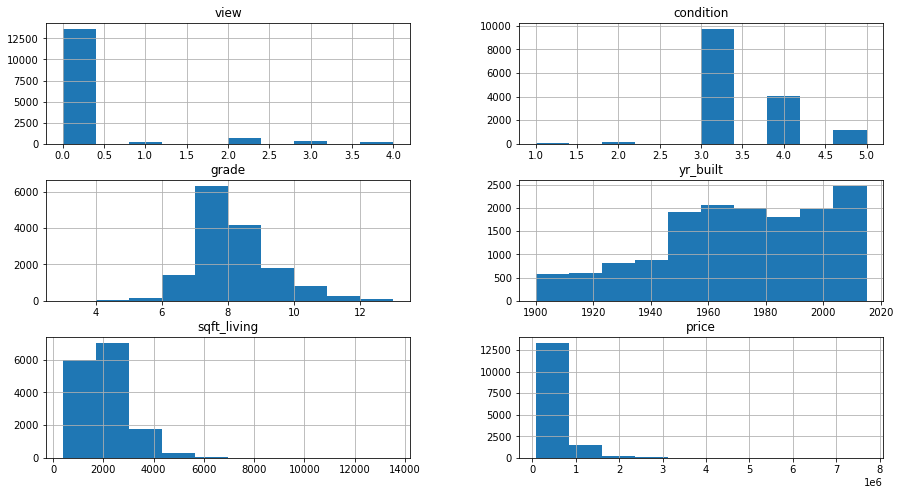

In [341]:
train_data.hist(figsize=(15,8))

In [342]:
train_data.corr()

,view,condition,grade,yr_built,sqft_living,price
view,1.000000,0.039500,0.247528,-0.042225,0.279977,0.388761
condition,0.039500,1.000000,-0.146941,-0.356560,-0.057300,0.033836
grade,0.247528,-0.146941,1.000000,0.448090,0.763820,0.667617
yr_built,-0.042225,-0.356560,0.448090,1.000000,0.316274,0.056256
sqft_living,0.279977,-0.057300,0.763820,0.316274,1.000000,0.702995
price,0.388761,0.033836,0.667617,0.056256,0.702995,1.000000


<AxesSubplot:>

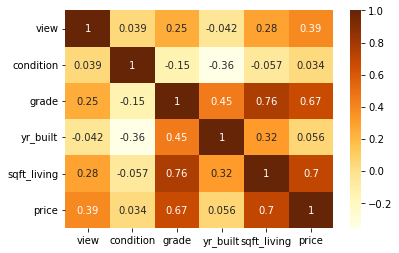

In [343]:
plt.figure()
sns.heatmap(train_data.corr(),annot=True, cmap="YlOrBr")

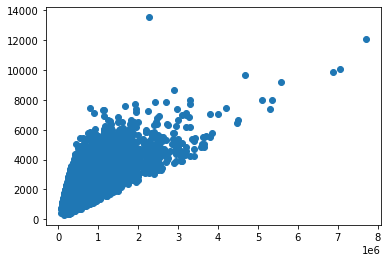

In [345]:
plt.scatter(df['price'],df['sqft_living'])

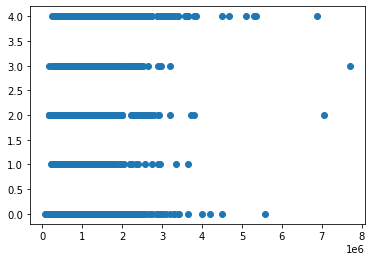

In [397]:
plt.scatter(df['price'],df['view'])

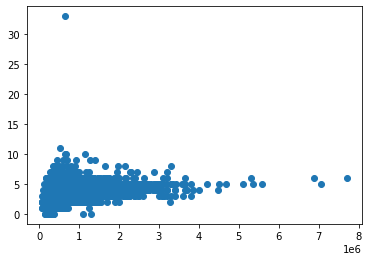

In [398]:
plt.scatter(df['price'],df['bedrooms'])

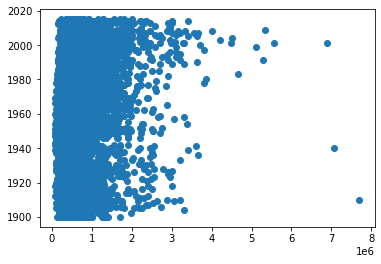

In [399]:
plt.scatter(df['price'],df['yr_built'])

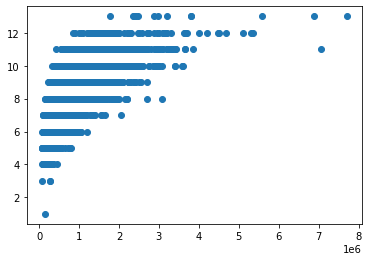

In [400]:
plt.scatter(df['price'],df['grade'])

In [347]:
pred_vals = results.predict(df[['yr_built','view','condition', 'grade', 'waterfront', 'bedrooms','floors', 'lat', 'long']])

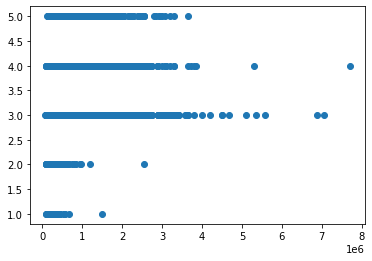

In [401]:
plt.scatter(df['price'],df['condition'])

In [402]:
results = ols("price ~  yr_built + view + condition + grade + waterfront + bedrooms + floors + lat + long", data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     3939.
Date:                Wed, 12 Jul 2023   Prob (F-statistic):               0.00
Time:                        16:45:14   Log-Likelihood:            -2.9711e+05
No. Observations:               21613   AIC:                         5.942e+05
Df Residuals:                   21603   BIC:                         5.943e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.682e+07    1.6e+06    -10.490      0.0

In [348]:
X_train, y_train = train_data.drop(['price'], axis=1), train_data['price']

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [349]:
pred_vals = results.predict(df[['yr_built', 'view','condition','grade','waterfront','bedrooms','floors', 'lat', 'long']])

In [350]:
pred_vals

0        358665.382160
1        512509.454821
2        305729.238515
3        432334.028023
4        539866.108458
             ...      
21608    577157.348271
21609    465118.129194
21610    254789.016942
21611    480694.659460
21612    257270.938671
Length: 21613, dtype: float64

In [351]:
res = pd.concat([pred_vals.to_frame().rename(columns={0:'y_hat'}),df['price']], axis=1)

In [352]:
res

,y_hat,price
0,358665.382160,221900.0
1,512509.454821,538000.0
2,305729.238515,180000.0
3,432334.028023,604000.0
4,539866.108458,510000.0
...,...,...
21608,577157.348271,360000.0
21609,465118.129194,400000.0
21610,254789.016942,402101.0
21611,480694.659460,400000.0


In [353]:
res['error'] = res['y_hat'] - res['price']

In [354]:
res.head(1)

,y_hat,price,error
0,358665.38216,221900.0,136765.38216


In [355]:
res['sq_error'] = res['error']**2

In [356]:
np.sqrt(res['sq_error'].mean())

225908.47259132247

(array([3.0000e+00, 0.0000e+00, 2.0000e+00, 3.0000e+00, 1.0000e+01,
        4.6000e+01, 2.4100e+02, 1.0880e+04, 1.0406e+04, 2.2000e+01]),
 array([-5553362.73608169, -4855950.6894897 , -4158538.64289771,
        -3461126.59630571, -2763714.54971372, -2066302.50312173,
        -1368890.45652974,  -671478.40993775,    25933.63665424,
          723345.68324623,  1420757.72983822]),
 <BarContainer object of 10 artists>)

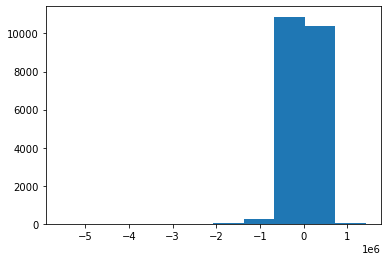

In [357]:
plt.hist(res['error'])

(array([1.9021e+04, 2.1480e+03, 3.1600e+02, 9.0000e+01, 2.6000e+01,
        4.0000e+00, 4.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([  75000.,  837500., 1600000., 2362500., 3125000., 3887500.,
        4650000., 5412500., 6175000., 6937500., 7700000.]),
 <BarContainer object of 10 artists>)

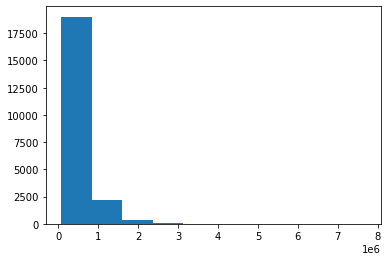

In [358]:
plt.hist(df['price'])

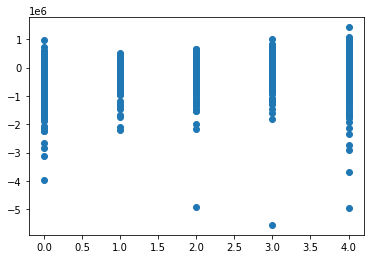

In [359]:
import matplotlib.pyplot as plt
plt.scatter(df['view'],res['error'])

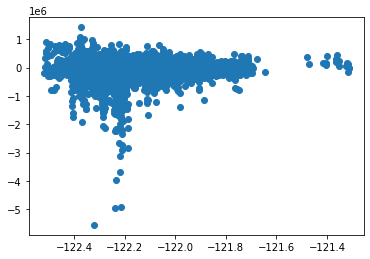

In [360]:
plt.scatter(df['long'],res['error'])

((array([-3.99703558, -3.78181236, -3.66408326, ...,  3.66408326,
          3.78181236,  3.99703558]),
  array([-5553362.73608169, -4949076.08325351, -4909030.05976052, ...,
          1005475.19579744,  1060634.5261217 ,  1420757.72983822])),
 (196697.08261150675, -1.7787866034314424e-08, 0.870538707731003))

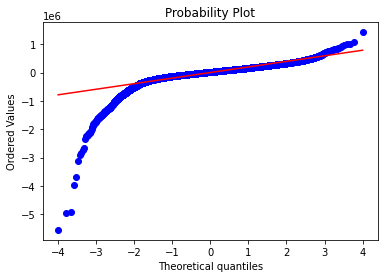

In [361]:
import scipy.stats as stats
fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(res['error'], dist='norm', plot=ax)

In [362]:
infl = results.get_influence()
print(infl.summary_frame())

       dfb_Intercept  dfb_yr_built  dfb_view  dfb_condition  dfb_grade  \
0          -0.000145      0.001566  0.001128       0.003974  -0.000511   
1          -0.000357     -0.000611 -0.000111      -0.000501  -0.000543   
2          -0.000993      0.003069 -0.000156       0.003839   0.002639   
3          -0.008007      0.007266 -0.001817       0.012609  -0.002066   
4          -0.000619     -0.000366  0.000222       0.000521  -0.000485   
...              ...           ...       ...            ...        ...   
21608       0.010082     -0.005974  0.000471      -0.002032   0.006278   
21609       0.003478     -0.003223  0.000462       0.000126   0.000933   
21610      -0.005471      0.007338  0.000607       0.000584  -0.004446   
21611      -0.001548     -0.001000  0.000264       0.000343   0.000416   
21612      -0.002469      0.003277  0.000267       0.000242  -0.002015   

       dfb_waterfront  dfb_bedrooms  dfb_floors   dfb_lat  dfb_long  \
0       -1.380467e-04      0.000524    0

In [363]:
infl.summary_frame()

,dfb_Intercept,dfb_yr_built,dfb_view,dfb_condition,dfb_grade,dfb_waterfront,dfb_bedrooms,dfb_floors,dfb_lat,dfb_long,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.000145,0.001566,0.001128,0.003974,-0.000511,-1.380467e-04,0.000524,0.003135,0.001740,0.000678,5.204217e-06,-0.605305,0.000142,-0.007214,-0.605296,-0.007214
1,-0.000357,-0.000611,-0.000111,-0.000501,-0.000543,4.365215e-07,-0.000087,0.001083,0.000713,-0.000185,3.396494e-07,0.112825,0.000267,0.001843,0.112822,0.001843
2,-0.000993,0.003069,-0.000156,0.003839,0.002639,-2.308228e-05,0.003466,0.000680,-0.004724,-0.002468,1.098549e-05,-0.556519,0.000355,-0.010481,-0.556510,-0.010481
3,-0.008007,0.007266,-0.001817,0.012609,-0.002066,3.687582e-04,0.004281,-0.003601,-0.000374,-0.008035,2.968400e-05,0.759911,0.000514,0.017229,0.759904,0.017229
4,-0.000619,-0.000366,0.000222,0.000521,-0.000485,-7.150779e-05,0.000441,0.001290,-0.000549,-0.000903,4.376194e-07,-0.132190,0.000250,-0.002092,-0.132187,-0.002092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,0.010082,-0.005974,0.000471,-0.002032,0.006278,2.386603e-04,0.003000,-0.016291,-0.006261,0.007993,5.590337e-05,-0.961331,0.000605,-0.023644,-0.961329,-0.023644
21609,0.003478,-0.003223,0.000462,0.000126,0.000933,-8.058754e-05,-0.001446,-0.000363,0.000427,0.003610,2.791153e-06,-0.288232,0.000336,-0.005283,-0.288226,-0.005283
21610,-0.005471,0.007338,0.000607,0.000584,-0.004446,-2.038081e-04,-0.005610,0.002924,0.002273,-0.004411,1.601686e-05,0.652059,0.000377,0.012656,0.652050,0.012656
21611,-0.001548,-0.001000,0.000264,0.000343,0.000416,-2.494126e-05,0.001404,-0.001455,0.000020,-0.001752,2.048872e-06,-0.357147,0.000161,-0.004526,-0.357140,-0.004526


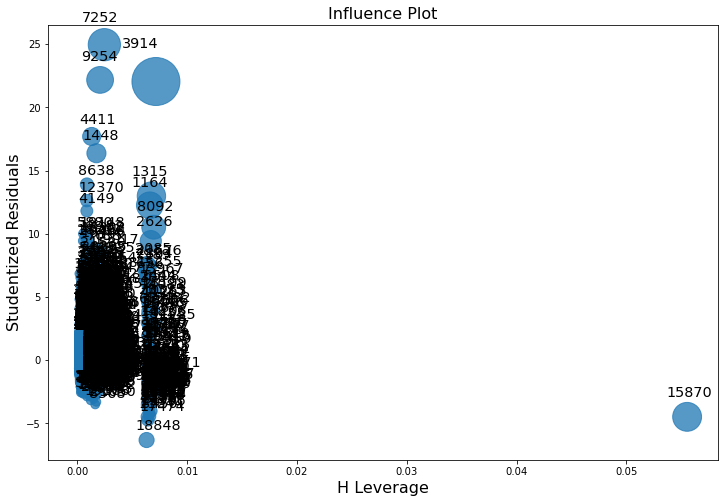

In [364]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(results, ax=ax, criterion='cooks')

In [365]:
# define transformers
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.impute import SimpleImputer
import numpy as np
cat_transformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown='ignore'))])
num_transformer = Pipeline(steps = [('scaler', StandardScaler())])

In [366]:
categorical_features = ['grade','condition', 'view','waterfront','yr_built','bedrooms']
numerical_features = ['lat','floors', 'long']
target = 'price'

In [367]:
X_train, X_test, y_train, y_test = train_test_split(df[categorical_features + numerical_features],df['price'],test_size = 0.3, random_state=1234)

In [368]:
cat_transformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown='ignore'))])
num_transformer = Pipeline(steps = [('scaler', StandardScaler())])

In [369]:
# building processor
preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, categorical_features), ('num', num_transformer, numerical_features)])

In [370]:
linear_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [371]:
linear_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['grade', 'condition', 'view',
                                                   'waterfront', 'yr_built',
                                                   'bedrooms']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['lat', 'floors', 'long'])])),
                ('regressor', LinearRegression())])

In [372]:
pred = linear_regression.predict(X_test)

In [373]:
pred

array([ 480252.32234873,  300915.61738827, 1353517.45960371, ...,
        362720.34782912,  567855.57254103,  343769.17891711])

In [374]:
from sklearn.metrics import mean_squared_error

In [375]:
np.sqrt(mean_squared_error(pred,y_test))

206115.46199230358

In [376]:
ridge_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=3.0))
])

In [377]:
ridge_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['grade', 'condition', 'view',
                                                   'waterfront', 'yr_built',
                                                   'bedrooms']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['lat', 'floors', 'long'])])),
                ('regressor', Ridge(alpha=3.0))])

In [378]:
pred_ridge = ridge_regression.predict(X_test)

In [379]:
np.sqrt(mean_squared_error(pred_ridge,y_test))

206289.86587083753

In [380]:
lasso_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=1.0))
])

In [393]:
lasso_regression.fit(X_train, y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48741961082290.375, tolerance: 207065660607.36664
  model = cd_fast.sparse_enet_coordinate_descent(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['grade', 'condition', 'view',
                                                   'waterfront', 'yr_built',
                                                   'bedrooms']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['lat', 'floors', 'long'])])),
                ('regressor', Lasso())])

In [382]:
lasso_pred = lasso_regression.predict(X_test)

In [383]:
np.sqrt(mean_squared_error(lasso_pred, y_test))

205979.04491342214

In [384]:
elasticnet_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet(alpha=1.0, l1_ratio=0.8))
])

In [385]:
elasticnet_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['grade', 'condition', 'view',
                                                   'waterfront', 'yr_built',
                                                   'bedrooms']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['lat', 'floors', 'long'])])),
                ('regressor', ElasticNet(l1_ratio=0.8))])

In [386]:
elasticnet_pred = elasticnet_regression.predict(X_test)

In [387]:
np.sqrt(mean_squared_error(elasticnet_pred, y_test))

281546.659796902

In [388]:
y_test

12432     485000.0
7793      358000.0
13435     716500.0
1821      367500.0
12449     544000.0
           ...    
2596     1065000.0
21161     459990.0
20133     388500.0
11130     530000.0
16762     449400.0
Name: price, Length: 6484, dtype: float64

In [389]:
elastic_net_pred = pd.concat([pd.DataFrame(elasticnet_pred).rename(columns={0:'pred'}),y_test.reset_index().drop('index',axis=1).rename(columns={0:'actual'})], axis=1)

In [390]:
elastic_net_pred['res'] = elastic_net_pred['pred'] - elastic_net_pred['price']

In [391]:
X_test

,grade,condition,view,waterfront,yr_built,bedrooms,lat,floors,long
12432,8,4,0,0,1976,3,47.5217,1.0,-122.050
7793,8,3,0,0,1988,3,47.3473,2.0,-122.314
13435,11,3,0,0,2000,5,47.4289,2.0,-122.094
1821,7,4,0,0,1978,3,47.7563,1.0,-122.075
12449,8,3,0,0,1994,4,47.5692,2.0,-122.006
...,...,...,...,...,...,...,...,...,...
2596,8,3,0,0,1987,2,47.6144,2.0,-122.211
21161,8,3,0,0,2013,3,47.4761,2.0,-121.734
20133,8,3,0,0,2006,4,47.3255,2.0,-122.164
11130,8,4,0,0,1973,3,47.6398,1.0,-122.113


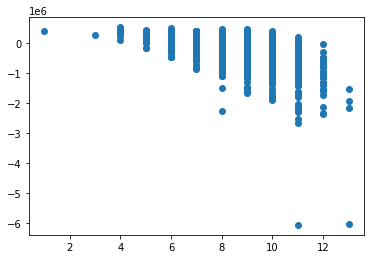

In [394]:
import matplotlib.pyplot as plt
plt.scatter(X_test['grade'],elastic_net_pred['res'])

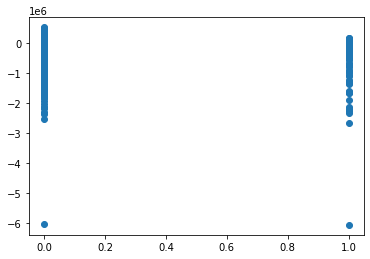

In [395]:
import matplotlib.pyplot as plt
plt.scatter(X_test['waterfront'],elastic_net_pred['res'])

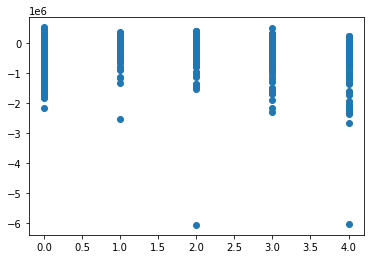

In [396]:
import matplotlib.pyplot as plt
plt.scatter(X_test['view'],elastic_net_pred['res'])